In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\ML PROJECTS\CLUSTERING\K-Means\Universities.csv")

In [3]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [5]:
df_new = df.iloc[: , 1:]

In [6]:
df_new.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit_transform(df_new)

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [9]:
sclaed_df = pd.DataFrame(scaler.fit_transform(df_new) , columns = df_new.columns)

In [10]:
sclaed_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


## Creating our ELBOW METHOD

C:\Users\mobin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mobin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mobin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mobin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

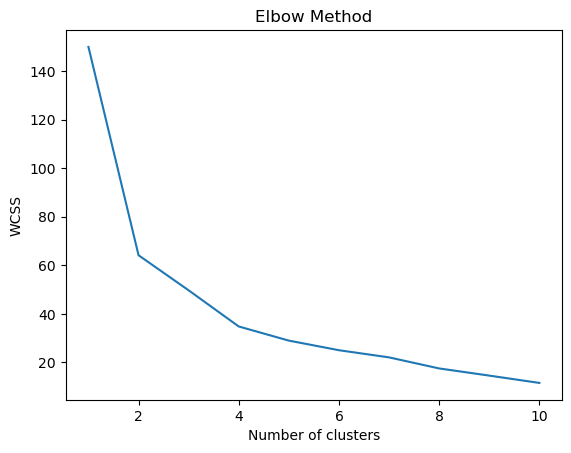

In [11]:
wcss = []

for i in range(1,11):

    kmeans = KMeans(n_clusters= i , random_state= 0)
    kmeans.fit(sclaed_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)



plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [12]:
cluster = KMeans(3,random_state=10)
cluster.fit(sclaed_df)

C:\Users\mobin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=10)

In [13]:
cluster.labels_

array([2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 2,
       2, 1, 2])

In [14]:
set(cluster.labels_)

{0, 1, 2}

In [15]:
df['Clustered'] = cluster.labels_

In [19]:
df_new['Clustered'] = cluster.labels_

In [16]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clustered
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [20]:
df_new.groupby('Clustered').agg(['mean'])

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,mean,mean,mean,mean,mean,mean
Clustered,,,,,,
0,1317.5000,78.00,44.500,8.750,46418.000,81.7500
1,1085.2000,44.00,69.600,18.600,11056.400,74.4000
2,1310.3125,86.25,28.375,11.875,27734.125,91.8125


In [21]:
from sklearn.metrics import silhouette_score

In [22]:
score = silhouette_score(sclaed_df , cluster.labels_ , metric = 'euclidean')
score

0.38527988006601244

In [23]:
df[df['Clustered'] == 0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clustered
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,0
9,JohnsHopkins,1305,75,44,7,58691,87,0
19,UChicago,1290,75,50,13,38380,87,0


In [24]:
df[df['Clustered'] == 1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clustered
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
20,UMichigan,1180,65,68,16,15470,85,1
23,UWisconsin,1085,40,69,15,11857,71,1


In [25]:
df[df['Clustered'] == 2]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clustered
0,Brown,1310,89,22,13,22704,94,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,2
10,MIT,1380,94,30,10,34870,91,2
11,Northwestern,1260,85,39,11,28052,89,2
12,NotreDame,1255,81,42,13,15122,94,2
